<a href="https://colab.research.google.com/github/omkart0124/Exploratory-Data-Analysis/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('mall.csv')
df.head()

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163


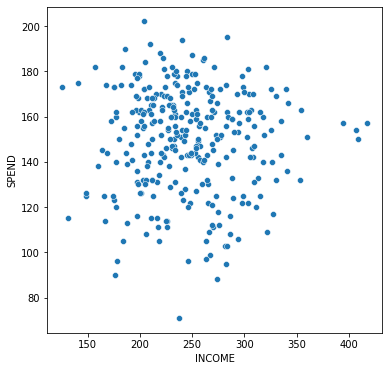

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df,x='INCOME',y='SPEND')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km = KMeans(n_clusters=3)
km.fit(df)#-----fit whole data
print(km.inertia_)#    want to check inertia level
#----decide cluster means total k by default its 8 clusters
# n_init : when you want to iterate the values i will use 10
# means mini 10 times it will change the centroid and then it will go(max_iter is 300 means)
# so init means how many times your data will be clustering/modify

297101.3764201943


In [ ]:
# checking centroid
km.cluster_centers_

array([[317.55      , 148.73333333],
       [196.68224299, 150.57943925],
       [251.61764706, 149.31617647]])

In [ ]:
# because we said 3 it gives 3 values on x and y axis

In [ ]:
# based on these 3 centroid i will create the clusters
# means i am going to check the centroids and we will plot the clusters also
# and then we will also check how to view the elbow method

In [ ]:
# make some small modification
# creating dataframe for my clusters

centroid_df = pd. DataFrame(km.cluster_centers_, columns=['x','y'])#----df created
centroid_df

,x,y
0,317.550000,148.733333
1,196.682243,150.579439
2,251.617647,149.316176


In [ ]:
# i am supposed to get the values
# we already done with fitting in above
# now we do predicts
# fit.predict : means fitting and predicting together

lables = km.predict(df)

In [ ]:
lables#----want to check whole lable because its an array

# all the no are given to use

array([2, 2, 1, 2, 0, 1, 0, 2, 1, 1, 2, 2, 2, 1, 2, 1, 0, 2, 2, 2, 2, 2,
       2, 2, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 2, 2, 0, 0, 2, 1, 2,
       0, 0, 2, 2, 1, 2, 2, 0, 2, 1, 2, 1, 1, 2, 1, 0, 2, 0, 1, 1, 1, 1,
       1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 1,
       1, 2, 2, 1, 1, 0, 1, 2, 0, 2, 0, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2,
       0, 1, 0, 1, 2, 1, 1, 1, 1, 2, 0, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2,
       0, 2, 0, 2, 1, 1, 1, 2, 0, 0, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2,
       1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1,
       2, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 1, 0, 1, 1, 2, 1, 0, 2, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 0, 2, 0, 2, 0, 2, 2,
       0, 1, 2, 0, 2, 1, 2, 1, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2,
       1, 2, 1, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2,
       1, 1, 0, 1, 0, 2, 2, 2, 2, 2, 2, 1, 1, 2, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 2, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 2, 2, 1,

In [ ]:
# want to create new df which have to attached these lables
# so i can plot these centroids as well as create the clusters
# df_new_3 : because its cluster of 3


df_new_3 = pd.concat([df,pd.DataFrame({'labels':lables})], axis=1)
# have to create labels is an array that needs to conveted into df
# created dict which is going to be lables : the variable labels

In [ ]:

df_new_3.head()
# getting categories along with datapoints

,INCOME,SPEND,labels
0,233,150,2
1,250,187,2
2,204,172,1
3,236,178,2
4,354,163,0


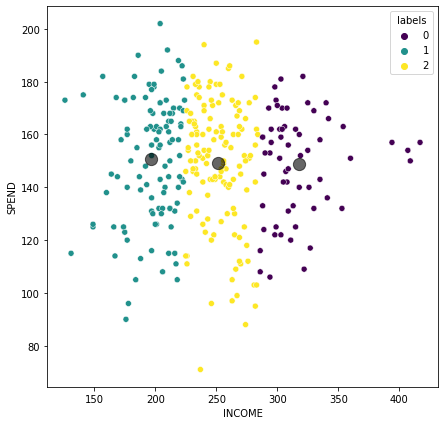

In [ ]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df_new_3,x='INCOME',y='SPEND', hue='labels', palette='viridis')
plt.scatter(x=centroid_df["x"],y=centroid_df["y"], color="black",s=150,alpha=0.6)
plt.show()

In [ ]:
# we create a normal plt.scatter x= centroid_df of x and y

# data points lil bigger  because if those are in normal size we are not able to see the points
# alpha : transperency want to visible 
# 3 clusters have been created 

In [ ]:
# Elbow method

inertia = []
for k in range(1,30):
  km = KMeans(n_clusters=k)#    value that we added
  km.fit(df)
  inertia.append(km.inertia_)

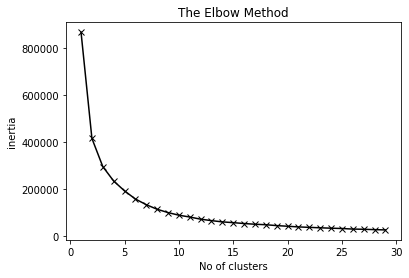

In [ ]:
plt.plot(range(1,30), inertia,'kx-')#----x value is range between 1 to 30 and y is inertia kx- to visible the values
plt.title("The Elbow Method")
plt.xlabel("No of clusters")
plt.ylabel("inertia")
plt.show()

In [ ]:
# around 5 there is a drasting drop in the values
# after that there is no much of drop
# Now we will do the same thing as above
# but focused on clusters of 5

In [ ]:
km = KMeans(n_clusters=5)
km.fit(df)
print(km.inertia_)

193333.51167275637


In [ ]:
centroid_df = pd. DataFrame(km.cluster_centers_, columns=['x','y'])#----df created
centroid_df

,x,y
0,321.346154,153.230769
1,199.387097,168.080645
2,196.300000,126.740000
3,249.640777,159.757282
4,269.944444,115.611111


In [ ]:
lables = km.predict(df)
lables

array([3, 3, 1, 3, 0, 1, 0, 3, 1, 1, 3, 4, 3, 2, 3, 1, 0, 2, 3, 3, 3, 3,
       1, 3, 1, 0, 1, 2, 0, 1, 1, 2, 1, 3, 2, 1, 0, 3, 3, 0, 0, 3, 1, 3,
       0, 0, 3, 3, 2, 3, 3, 0, 3, 1, 3, 1, 1, 3, 1, 0, 4, 0, 1, 2, 1, 1,
       2, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 1, 1, 3, 3, 0, 0, 0, 4, 3, 3, 1,
       1, 4, 3, 1, 1, 0, 2, 2, 0, 3, 0, 3, 3, 3, 1, 3, 1, 2, 3, 3, 3, 3,
       0, 1, 0, 1, 3, 1, 1, 1, 1, 3, 4, 3, 3, 3, 1, 1, 2, 3, 1, 4, 1, 3,
       0, 3, 0, 3, 2, 2, 2, 4, 0, 0, 1, 2, 2, 3, 3, 3, 3, 1, 3, 2, 3, 3,
       1, 2, 3, 1, 2, 1, 3, 0, 1, 1, 1, 4, 2, 3, 3, 1, 3, 3, 3, 1, 2, 2,
       3, 0, 2, 4, 0, 2, 0, 3, 4, 0, 3, 4, 3, 1, 0, 2, 2, 4, 1, 0, 3, 3,
       4, 3, 1, 3, 4, 3, 2, 3, 3, 3, 2, 1, 3, 3, 2, 0, 3, 0, 4, 0, 4, 3,
       0, 2, 3, 4, 4, 2, 4, 2, 0, 0, 3, 4, 0, 4, 0, 0, 0, 0, 0, 3, 4, 3,
       2, 4, 2, 3, 0, 4, 3, 3, 4, 3, 4, 4, 4, 0, 4, 2, 3, 3, 3, 3, 4, 3,
       2, 2, 0, 2, 4, 4, 3, 3, 4, 3, 4, 1, 2, 3, 0, 2, 0, 1, 2, 1, 2, 0,
       1, 3, 0, 2, 1, 0, 3, 1, 2, 2, 2, 2, 4, 4, 2,

In [ ]:
df_new_5 = pd.concat([df,pd.DataFrame({'labels':lables})], axis=1)
df_new_5.head()

,INCOME,SPEND,labels
0,233,150,3
1,250,187,3
2,204,172,1
3,236,178,3
4,354,163,0


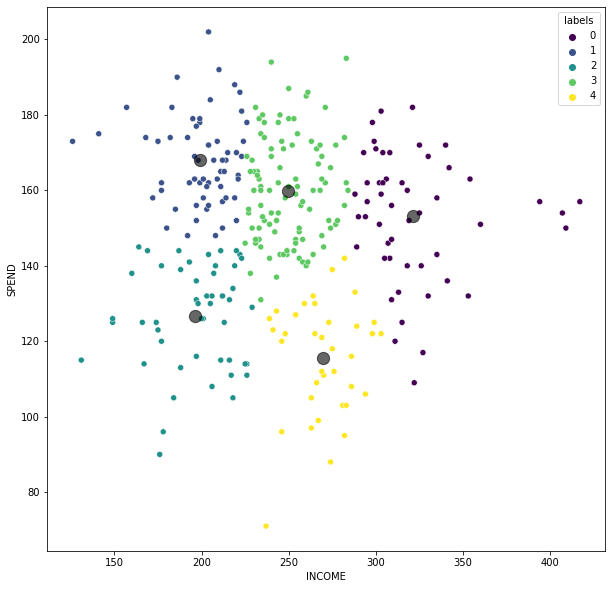

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_new_5,x='INCOME',y='SPEND', hue='labels', palette='viridis')
plt.scatter(x=centroid_df["x"],y=centroid_df["y"], color="black",s=150,alpha=0.6)
plt.show()

In [ ]:
# 5 diff clusters have been created